# Project 1 Code

In [35]:
# import the data
import pandas as pd
salary_df = pd.read_csv('ds_salaries.csv')

# show first few rows
salary_df.head()

,id,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [36]:
# remove id, salary, and salary_currency columms
salary_df = salary_df.drop(['id','salary','salary_currency'], axis=1)

# show updated data
salary_df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L


In [37]:
# Show how many NA values are present by column
salary_df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

Text(0.5, 1.0, 'Histogram of Salaries')

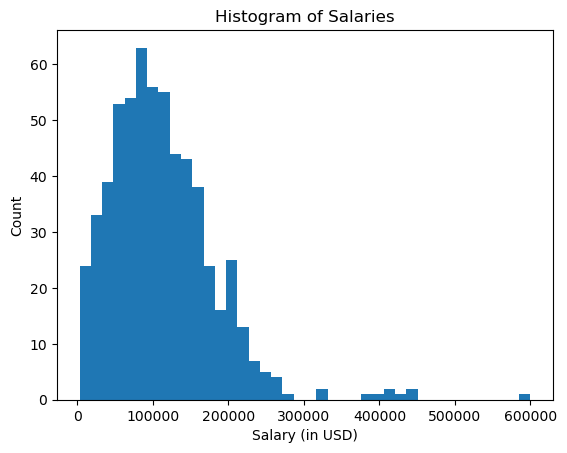

In [38]:
# import matplotlib and show histogram of Days in Shelter
import matplotlib.pyplot as plt

plt.hist(salary_df['salary_in_usd'], bins=40)
plt.xlabel('Salary (in USD)')
plt.ylabel('Count')
plt.title('Histogram of Salaries')

In [39]:
# find the median salary
import statistics
statistics.median(salary_df['salary_in_usd'])

101570

In [40]:
# find the 25th and 75th percentile
import numpy as np
print("75th percentile : ",
      np.percentile(salary_df['salary_in_usd'], 75))
print("25th percentile : ",
      np.percentile(salary_df['salary_in_usd'], 25))

75th percentile :  150000.0
25th percentile :  62726.0


In [41]:
# show descriptive statistics for salary column
salary_df['salary_in_usd'].describe()

count       607.000000
mean     112297.869852
std       70957.259411
min        2859.000000
25%       62726.000000
50%      101570.000000
75%      150000.000000
max      600000.000000
Name: salary_in_usd, dtype: float64

C:\Users\allie\AppData\Local\Temp\ipykernel_9620\2225549060.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  order = salary_df.groupby('job_title').mean().sort_values('salary_in_usd').index


Text(0.5, 1.0, 'Average Salary by Job Title')

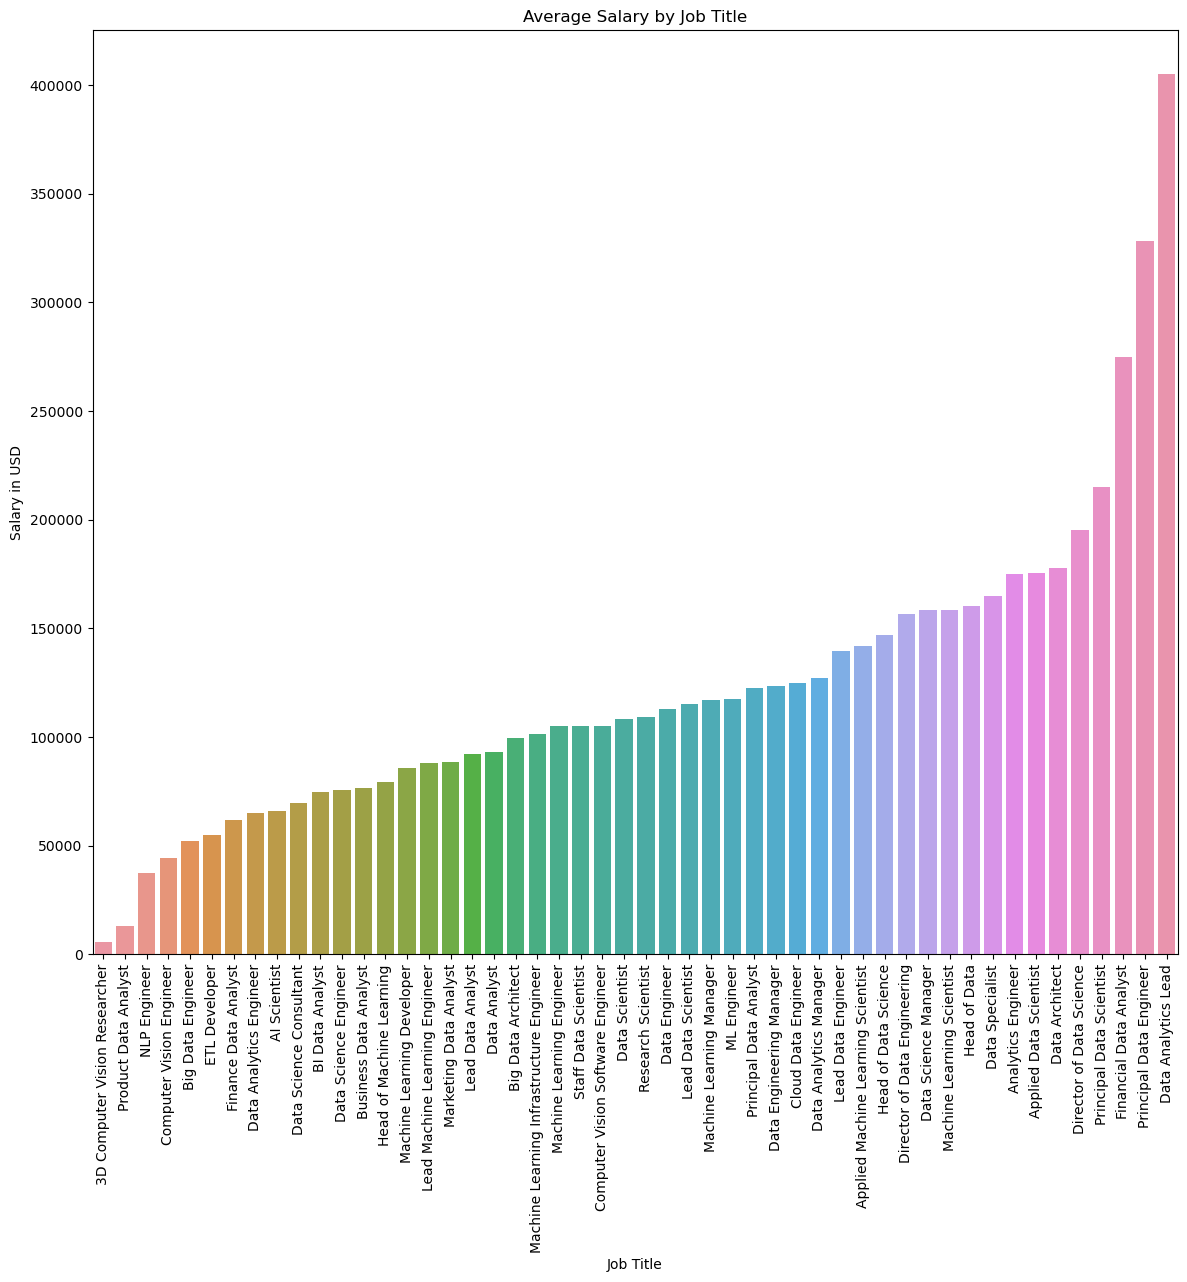

In [42]:
# Show bar plot of salary by job title
import seaborn as sns
fig = plt.figure(figsize=(14,12))
order = salary_df.groupby('job_title').mean().sort_values('salary_in_usd').index
sns.barplot(
    x='job_title',
    y='salary_in_usd',
    data=salary_df,
    order=order,
    errorbar=None,
)
plt.xticks(rotation=90)
plt.xlabel('Job Title')
plt.ylabel('Salary in USD')
plt.title('Average Salary by Job Title')

C:\Users\allie\AppData\Local\Temp\ipykernel_9620\2358026089.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  order = salary_df.groupby('company_size').mean().sort_values('salary_in_usd').index


Text(0.5, 1.0, 'Average Salary by Company Size')

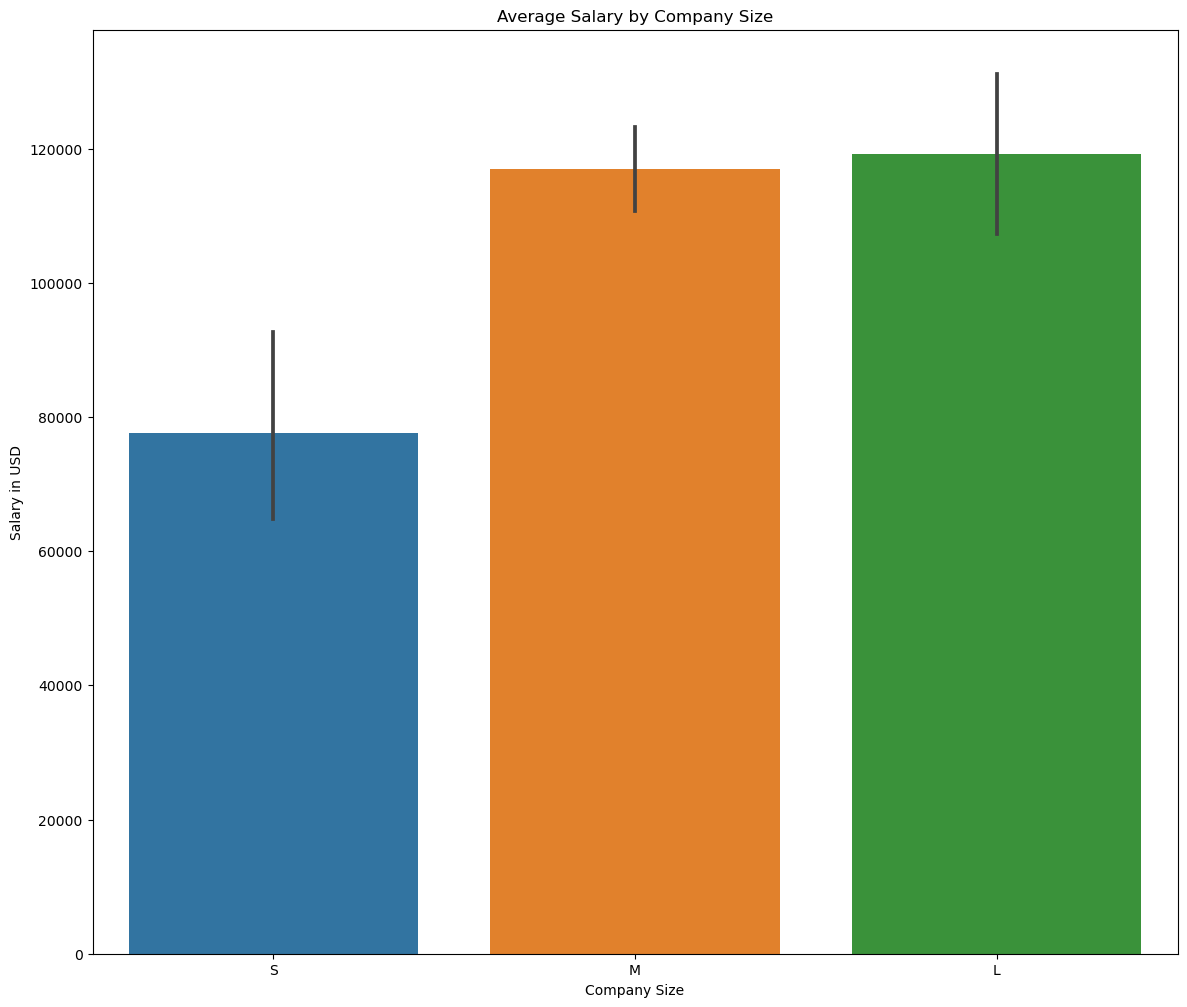

In [43]:
# Show bar plot of salary by company size
import seaborn as sns
fig = plt.figure(figsize=(14,12))
order = salary_df.groupby('company_size').mean().sort_values('salary_in_usd').index
sns.barplot(
    x='company_size',
    y='salary_in_usd',
    data=salary_df,
    order=order
)
plt.xlabel('Company Size')
plt.ylabel('Salary in USD')
plt.title('Average Salary by Company Size')

In [44]:
# Show the countries represented in the data
salary_df.company_location.unique()

array(['DE', 'JP', 'GB', 'HN', 'US', 'HU', 'NZ', 'FR', 'IN', 'PK', 'CN',
       'GR', 'AE', 'NL', 'MX', 'CA', 'AT', 'NG', 'ES', 'PT', 'DK', 'IT',
       'HR', 'LU', 'PL', 'SG', 'RO', 'IQ', 'BR', 'BE', 'UA', 'IL', 'RU',
       'MT', 'CL', 'IR', 'CO', 'MD', 'KE', 'SI', 'CH', 'VN', 'AS', 'TR',
       'CZ', 'DZ', 'EE', 'MY', 'AU', 'IE'], dtype=object)

C:\Users\allie\AppData\Local\Temp\ipykernel_9620\3314793716.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  order = salary_df.groupby('remote_ratio').mean().index


Text(0.5, 1.0, 'Average Salary by Remote Ratio')

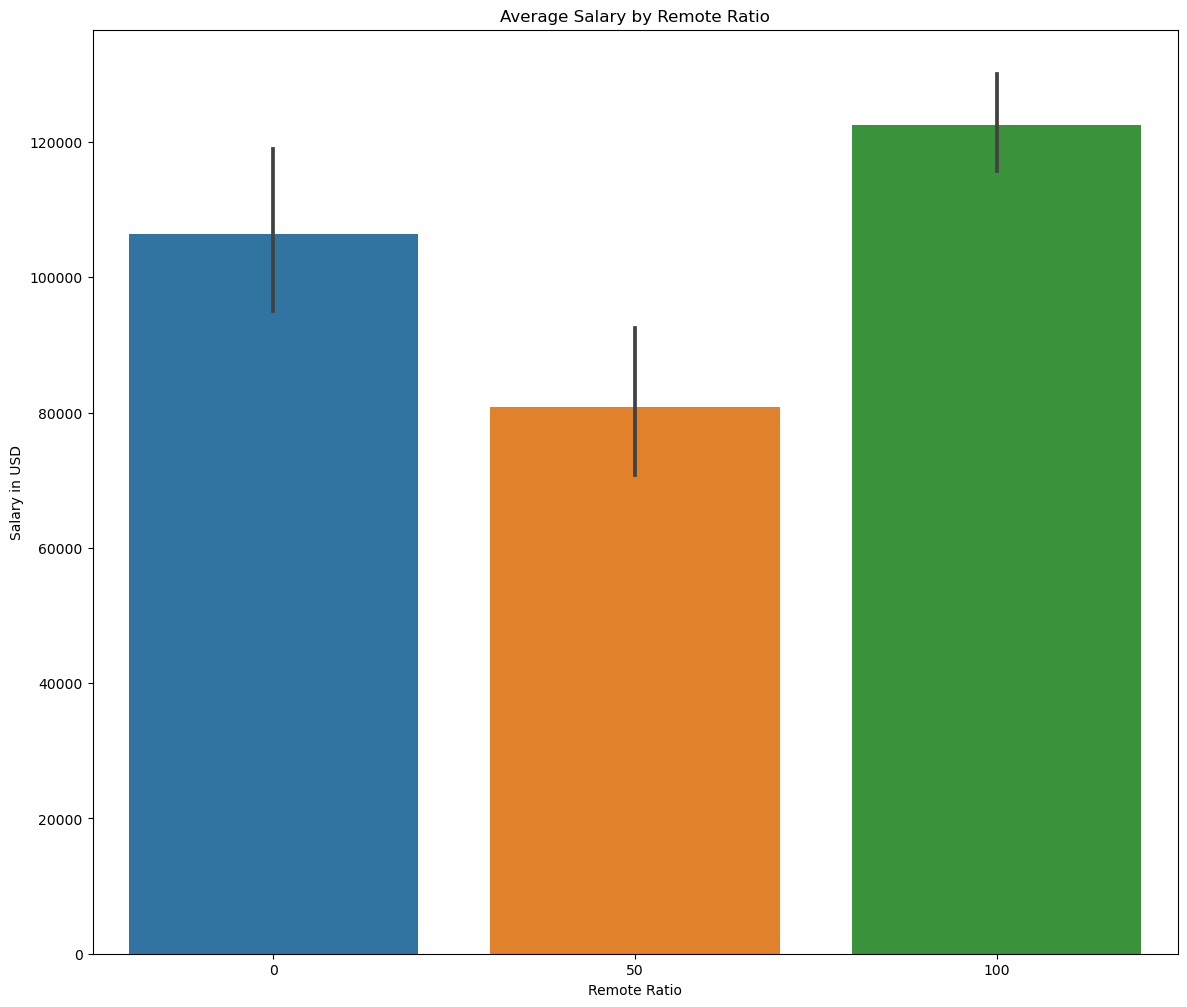

In [45]:
# Show average salary by remote ratio
fig = plt.figure(figsize=(14,12))
order = salary_df.groupby('remote_ratio').mean().index
sns.barplot(
    x='remote_ratio',
    y='salary_in_usd',
    data=salary_df,
    order=order
)
plt.xlabel('Remote Ratio')
plt.ylabel('Salary in USD')
plt.title('Average Salary by Remote Ratio')

In [46]:
# Show the top 10 most frequent job titles
salary_df['job_title'].value_counts()[:10]

Data Scientist                143
Data Engineer                 132
Data Analyst                   97
Machine Learning Engineer      41
Research Scientist             16
Data Science Manager           12
Data Architect                 11
Big Data Engineer               8
Machine Learning Scientist      8
Principal Data Scientist        7
Name: job_title, dtype: int64

C:\Users\allie\AppData\Local\Temp\ipykernel_9620\2676470107.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  order = salary_df.groupby('work_year').mean().index


Text(0.5, 1.0, 'Average Salary by Year')

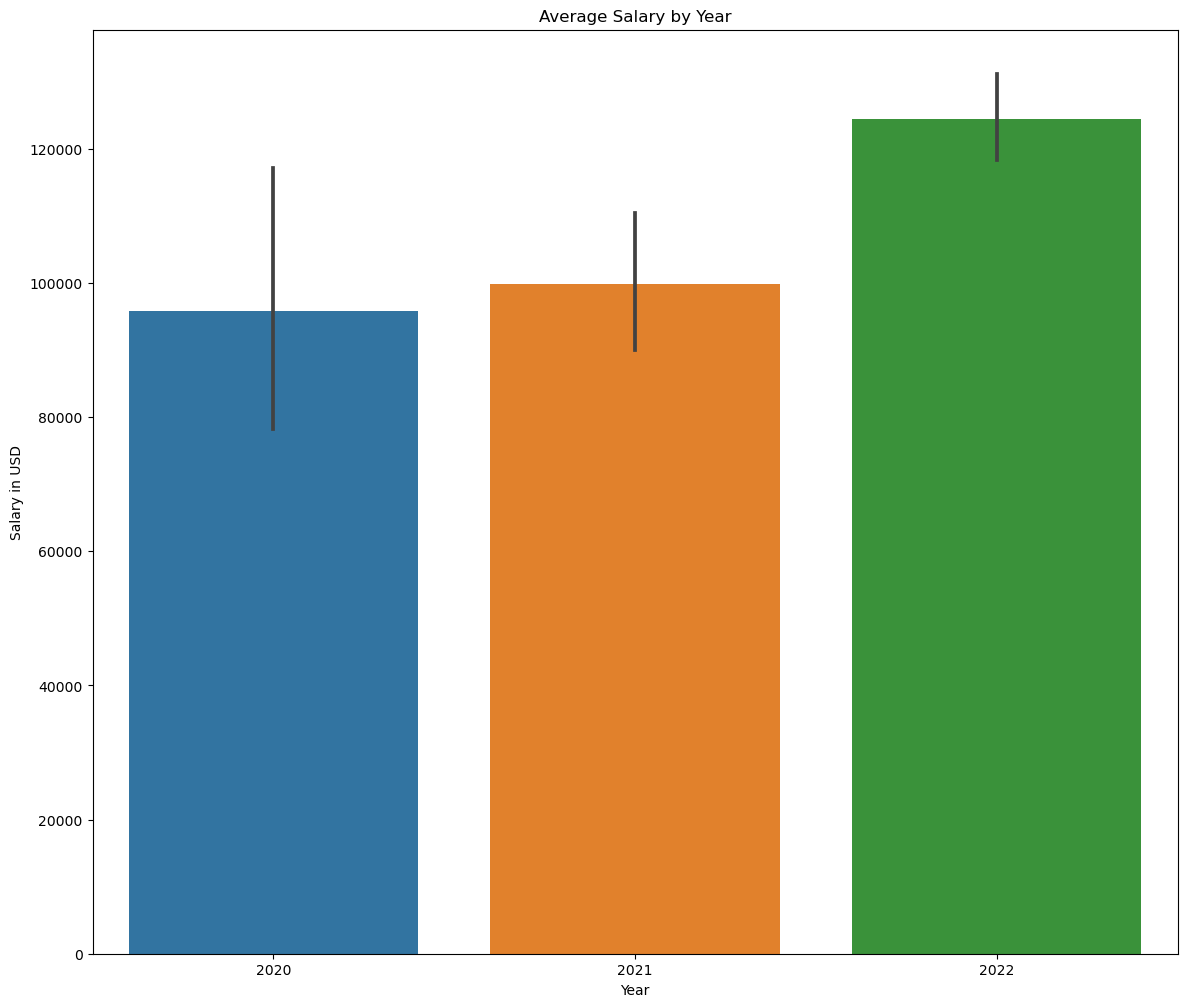

In [47]:
# Show average salary by year
fig = plt.figure(figsize=(14,12))
order = salary_df.groupby('work_year').mean().index
sns.barplot(
    x='work_year',
    y='salary_in_usd',
    data=salary_df,
    order=order
)
plt.xlabel('Year')
plt.ylabel('Salary in USD')
plt.title('Average Salary by Year')

C:\Users\allie\AppData\Local\Temp\ipykernel_9620\3539388702.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  order = salary_df.groupby('experience_level').mean().sort_values('salary_in_usd').index


Text(0.5, 1.0, 'Average Salary by Experience Level')

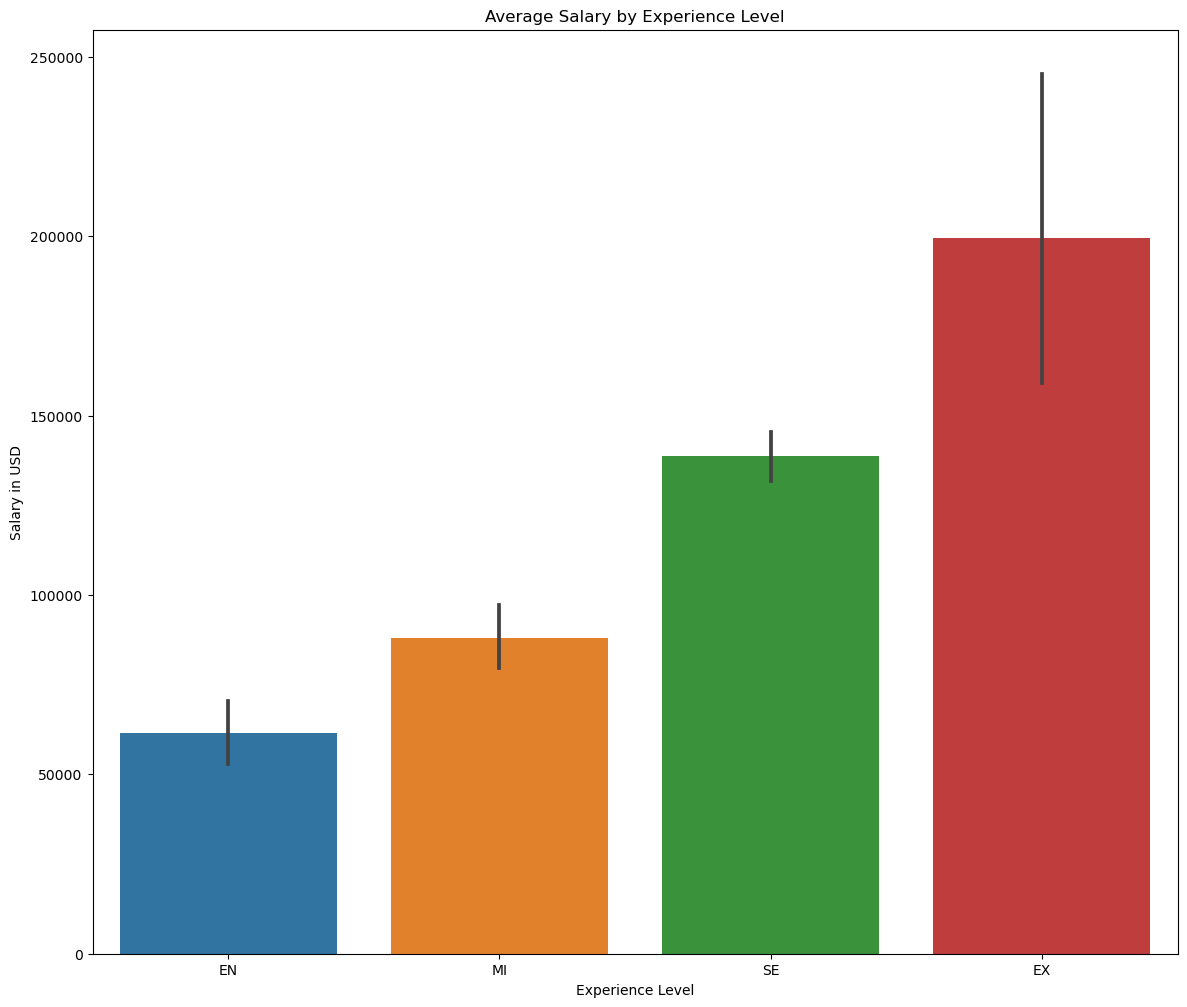

In [48]:
# Show average salary by experience level
fig = plt.figure(figsize=(14,12))
order = salary_df.groupby('experience_level').mean().sort_values('salary_in_usd').index
sns.barplot(
    x='experience_level',
    y='salary_in_usd',
    data=salary_df,
    order=order
)
plt.xlabel('Experience Level')
plt.ylabel('Salary in USD')
plt.title('Average Salary by Experience Level')

In [15]:
# Show average salary by experience level
salary_df.groupby('experience_level').salary_in_usd.mean()

experience_level
EN     61643.318182
EX    199392.038462
MI     87996.056338
SE    138617.292857
Name: salary_in_usd, dtype: float64

In [16]:
# Show average salary by country
salary_df.groupby('company_location').salary_in_usd.mean().sort_values(ascending=False)[:10]

company_location
RU    157500.000000
US    144055.261972
NZ    125000.000000
IL    119059.000000
JP    114127.333333
AU    108042.666667
AE    100000.000000
DZ    100000.000000
IQ    100000.000000
CA     99823.733333
Name: salary_in_usd, dtype: float64

In [17]:
# Show the number of positions by remote ratio
salary_df['remote_ratio'].value_counts()

100    381
0      127
50      99
Name: remote_ratio, dtype: int64

In [18]:
# Show average salary of entire data set
salary_df['salary_in_usd'].mean()

112297.86985172982

In [19]:
# Show average salary by employment type
salary_df.groupby('employment_type').salary_in_usd.mean()

employment_type
CT    184575.000000
FL     48000.000000
FT    113468.073129
PT     33070.500000
Name: salary_in_usd, dtype: float64

## Modeling

In [20]:
# create dummy variables for all categorical variables
salary_df = pd.get_dummies(salary_df)

salary_df.head()

,work_year,salary_in_usd,remote_ratio,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_CT,employment_type_FL,employment_type_FT,...,company_location_RU,company_location_SG,company_location_SI,company_location_TR,company_location_UA,company_location_US,company_location_VN,company_size_L,company_size_M,company_size_S
0,2020,79833,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,2020,260000,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,2020,109024,50,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,2020,20000,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,2020,150000,50,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,1,0,0


In [21]:
# split into features and target dataframes
features_df = salary_df.loc[:, salary_df.columns != 'salary_in_usd']
target_df = salary_df['salary_in_usd']

# split into training and testing data
from sklearn.model_selection import train_test_split
features_train, features_test, target_train, target_test = train_test_split(features_df, target_df, 
                                                                            test_size = 0.2, random_state = 1)

In [22]:
# Fit and transform the training features with a PCA so that 80% of the variance is retained
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.80)
features_train_pca = pca.fit_transform(features_train)

# Transform but do not fit the test features with the same PCA
features_test_pca = pca.transform(features_test)

### Linear Regression

In [23]:
# fit a linear regression model to the training set
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(features_train_pca, target_train)

LinearRegression()

In [24]:
predictions = model.predict(features_test_pca)

In [25]:
# Print the RMSE
from sklearn.metrics import mean_squared_error
mean_squared_error(target_test, predictions, squared=False)

63252.14146651265

In [26]:
# print the r2 value
from sklearn.metrics import r2_score
r2_score(target_test, predictions)

0.009141966112008237

In [27]:
pred_df = pd.DataFrame({
    'Real Salary': target_test,
    'Predicted Salary': predictions
})
pred_df

,Real Salary,Predicted Salary
65,62726,107261.763292
237,46809,119586.543305
147,90000,119587.481479
464,162674,119587.602536
187,69741,119586.875936
...,...,...
355,65438,94938.207280
376,132000,94939.961898
550,205300,94939.415768
5,72000,119587.576535


### Random Forest Regression - With PCA

In [28]:
# Fit a Random Forest Regression model to the data
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(features_train_pca, target_train)
rf_pred = rf_model.predict(features_test_pca)

In [29]:
# print the r2 value
from sklearn.metrics import r2_score
r2_score(target_test, rf_pred)

0.36040721008121046

In [30]:
# print the RMSE
mean_squared_error(target_test, rf_pred, squared=False)

50818.43609148525

In [31]:
pd.DataFrame({
    'Real Salary': target_test,
    'Predicted Salary': rf_pred
})

,Real Salary,Predicted Salary
65,62726,54960.910000
237,46809,39654.920000
147,90000,139828.923492
464,162674,90943.000000
187,69741,91236.380000
...,...,...
355,65438,76714.996667
376,132000,119627.668254
550,205300,159037.215152
5,72000,100251.000000


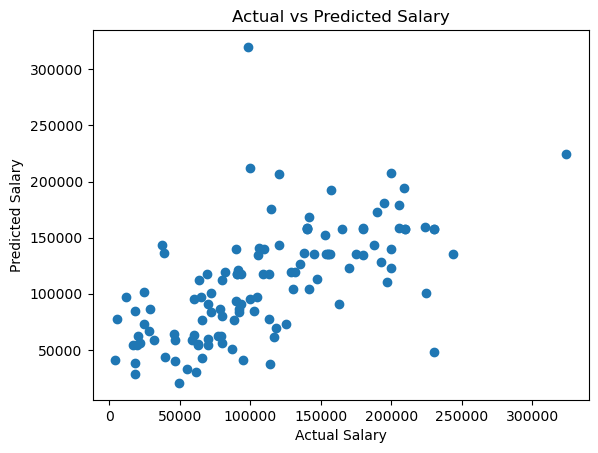

In [32]:
# predicted vs actual plot
plt.scatter(target_test, rf_pred)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs Predicted Salary')
plt.show()

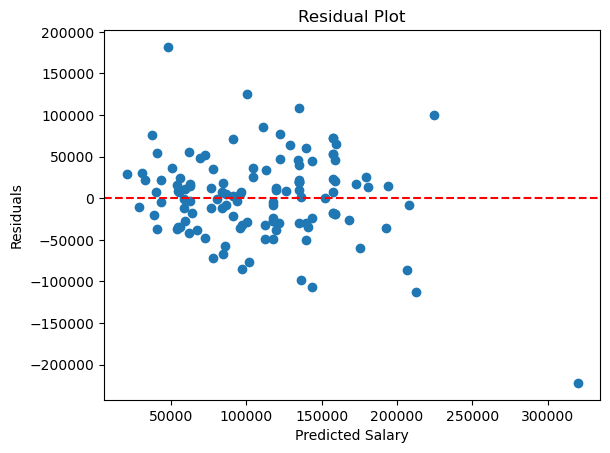

In [33]:
# plot residuals
residuals = target_test - rf_pred
plt.scatter(rf_pred, residuals)
plt.xlabel('Predicted Salary')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

### Random Forest Regression - Without PCA

In [49]:
# Fit a Random Forest Regression model to the data
rf_model2 = RandomForestRegressor()
rf_model2.fit(features_train, target_train)
rf_pred2 = rf_model2.predict(features_test)

In [50]:
# print the r2 value
r2_score(target_test, rf_pred2)

0.6477221125975372

In [51]:
# print the RMSE
mean_squared_error(target_test, rf_pred2, squared=False)

37714.83462289139

In [52]:
pd.DataFrame({
    'Real Salary': target_test,
    'Predicted Salary': rf_pred2
})

,Real Salary,Predicted Salary
65,62726,65052.119091
237,46809,42387.931238
147,90000,139990.174603
464,162674,150717.890000
187,69741,96006.430000
...,...,...
355,65438,84762.671000
376,132000,118561.400161
550,205300,163644.812879
5,72000,90400.000000


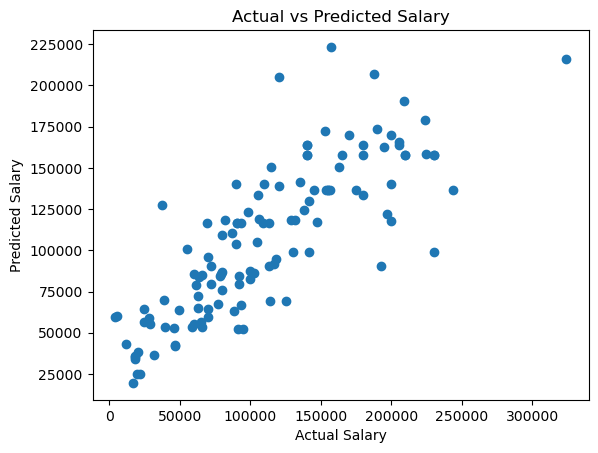

In [53]:
# predicted vs actual plot
plt.scatter(target_test, rf_pred2)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs Predicted Salary')
plt.show()

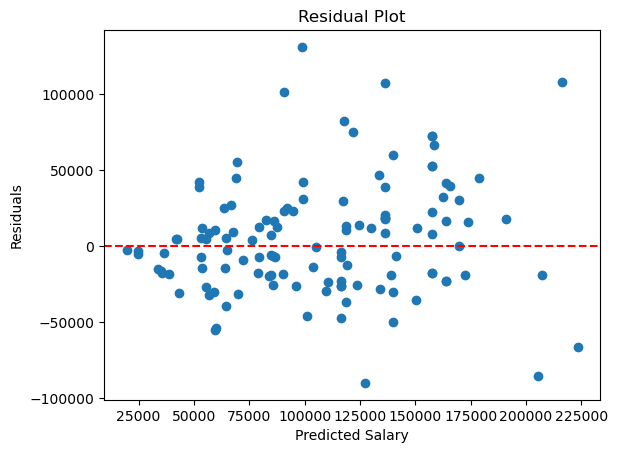

In [54]:
# plot residuals
residuals = target_test - rf_pred2
plt.scatter(rf_pred2, residuals)
plt.xlabel('Predicted Salary')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()